In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tools.eval_measures import rmse
import matplotlib.pyplot as plt

In [2]:
# Run the stored data from the Data_Preparation.ipynb
%run ..//Data_Preparation.ipynb

Data types in 'indu' dataframe:
Time       datetime64[ns]
indu_Q1           float64
indu_Q2           float64
indu_Q3           float64
indu_Q4           float64
indu_Q5           float64
indu_Q7           float64
dtype: object

Data types in 'cons' dataframe:
Time        datetime64[ns]
cons_Q1            float64
cons_Q2            float64
cons_Q3            float64
cons_Q4            float64
cons_Q5            float64
cons_Q6            float64
cons_Q7            float64
cons_Q8            float64
cons_Q9            float64
cons_Q10           float64
cons_Q11           float64
cons_Q12           float64
dtype: object

Data types in 'gdp' dataframe:
Time     datetime64[ns]
Value           float64
dtype: object
indu_Q1           float64
indu_Q2           float64
indu_Q3           float64
indu_Q4           float64
indu_Q5           float64
indu_Q7           float64
Time       datetime64[ns]
dtype: object
cons_Q1            float64
cons_Q2            float64
cons_Q3            float64
con

In [3]:
#Using the period 1990-2015 for training and 2016-2020 for testing
indu_train = indu[(indu['Time'] >= '1990-01-01') & (indu['Time'] < '2016-01-01')]
cons_train = cons[(cons['Time'] >= '1990-01-01') & (cons['Time'] < '2016-01-01')]
gdp_train = gdp[(gdp['Time'] >= '1990-01-01') & (gdp['Time'] < '2016-01-01')]

indu_test = indu[(indu['Time'] >= '2016-01-01') & (indu['Time'] < '2020-01-01')]
cons_test = cons[(cons['Time'] >= '2016-01-01') & (cons['Time'] < '2020-01-01')]
gdp_test = gdp[(gdp['Time'] >= '2016-01-01') & (gdp['Time'] < '2020-01-01')]

In [4]:
print(gdp_train)
print(cons_train)
print(indu_train)


          Time  Value
0   1990-01-01  210.2
1   1990-04-01  218.1
2   1990-07-01  209.5
3   1990-10-01  217.8
4   1991-01-01  220.2
..         ...    ...
99  2014-10-01  512.7
100 2015-01-01  495.9
101 2015-04-01  513.5
102 2015-07-01  505.9
103 2015-10-01  521.1

[104 rows x 2 columns]
      cons_Q1    cons_Q2    cons_Q3    cons_Q4    cons_Q5    cons_Q6  \
20  -3.166667   3.333333  -9.333333  -4.500000  -5.333333  -5.666667   
21  -0.666667   3.333333 -13.833333  -6.833333  -8.833333  -6.666667   
22  -0.500000   3.833333 -21.666667 -14.666667 -11.500000  -7.500000   
23  -2.666667   1.833333 -16.833333 -11.000000 -14.833333  -8.666667   
24  -1.666667   6.500000   2.000000  -1.000000 -23.666667 -15.833333   
..        ...        ...        ...        ...        ...        ...   
119  4.400000  13.666667  11.500000  14.666667  -5.433333  19.133333   
120  6.033333  14.300000  15.333333  19.933333 -17.733333  10.700000   
121  5.133333  15.133333  20.133333  23.266667  -8.433333  20.06

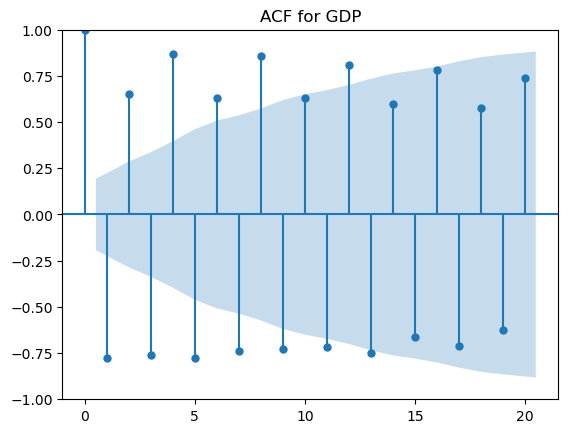

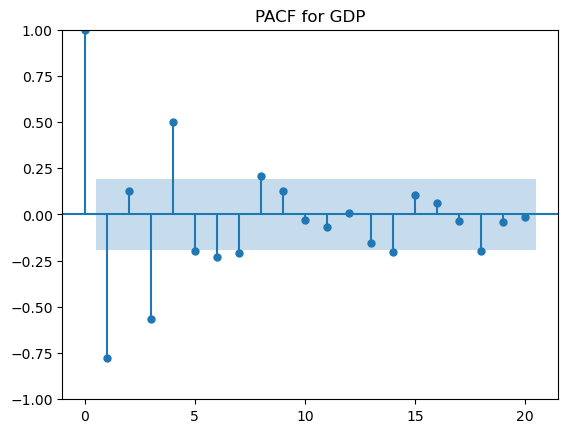

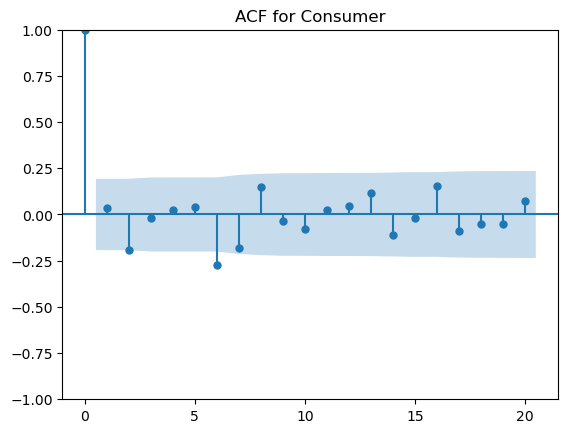

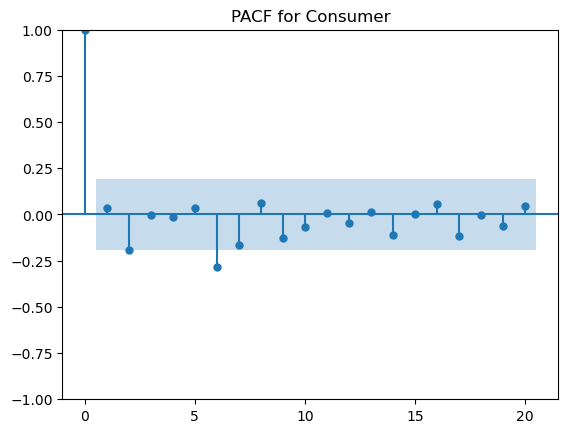

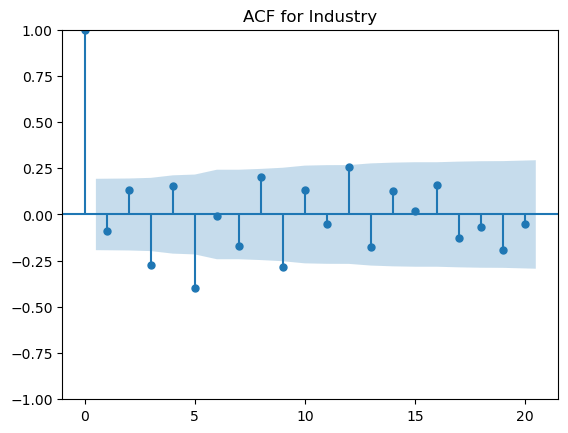

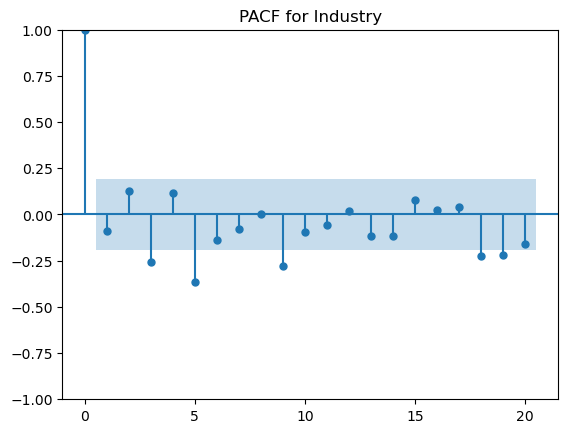

In [9]:
#Checking the data's acf and pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot the ACF for gdp
plot_acf(gdp_train['diff'].dropna(), lags=20)
plt.title('ACF for GDP')
plt.show()

# Plot the PACF for gdp
plot_pacf(gdp_train['diff'].dropna(), lags=20)
plt.title('PACF for GDP')
plt.show()

# Plot the ACF for cons
plot_acf(cons_train['diff'].dropna(), lags=20) 
plt.title('ACF for Consumer')
plt.show()

# Plot the PACF for cons
plot_pacf(cons_train['diff'].dropna(), lags=20)
plt.title('PACF for Consumer')
plt.show()

# Plot the ACF for indu
plot_acf(indu_train['diff'].dropna(), lags=20)
plt.title('ACF for Industry')
plt.show()

# Plot the PACF for indu
plot_pacf(indu_train['diff'].dropna(), lags=20)
plt.title('PACF for Industry')
plt.show()

#gdp shows significant lags until around 12.
#cons do not show significant lags.
#indu do not show significant lags.

In [6]:
from statsmodels.tsa.arima.model import ARIMA
import itertools

#Resetting the index
gdp_train.reset_index(drop=True, inplace=True)
indu_train.reset_index(drop=True, inplace=True)
cons_train.reset_index(drop=True, inplace=True)

# Combine the explanatory variables into a single DataFrame
exog = pd.concat([indu_train.dropna() , cons_train.dropna()], axis=1)

#Removing the time column
exog.drop('Time', axis=1, inplace=True)

# Define the range of values for p, d, and q
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 3)

# Create a list of all possible combinations of p, d, and q
param_combinations = list(itertools.product(p_values, d_values, q_values))

# Initialize variables to store the best model and its AIC value
best_model = None
best_aic = float('inf')

# Iterate over all combinations of p, d, and q
for params in param_combinations:
    try:
        # Create the ARIMA model with the current parameters
        model = ARIMA(gdp_train['Value'].dropna(), order=params, exog=exog)
        
        # Fit the model
        model_fit = model.fit()
        
        # Get the AIC value of the model
        aic = model_fit.aic
        
        # Check if the current model has a lower AIC value than the best model so far
        if aic < best_aic:
            best_model = model_fit
            best_aic = aic
    except:
        continue

# Print the summary of the best model
print(best_model.summary())

#The best model is a ARIMA(1,2,2)

                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                  104
Model:                 ARIMA(2, 2, 2)   Log Likelihood                -315.212
Date:                Sun, 24 Mar 2024   AIC                            676.424
Time:                        16:55:25   BIC                            736.798
Sample:                             0   HQIC                           700.872
                                - 104                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
indu_Q1        0.3075      0.087      3.540      0.000       0.137       0.478
indu_Q2       -0.1675      0.227     -0.738      0.461      -0.613       0.278
indu_Q3        0.0878      0.237      0.370      0.7

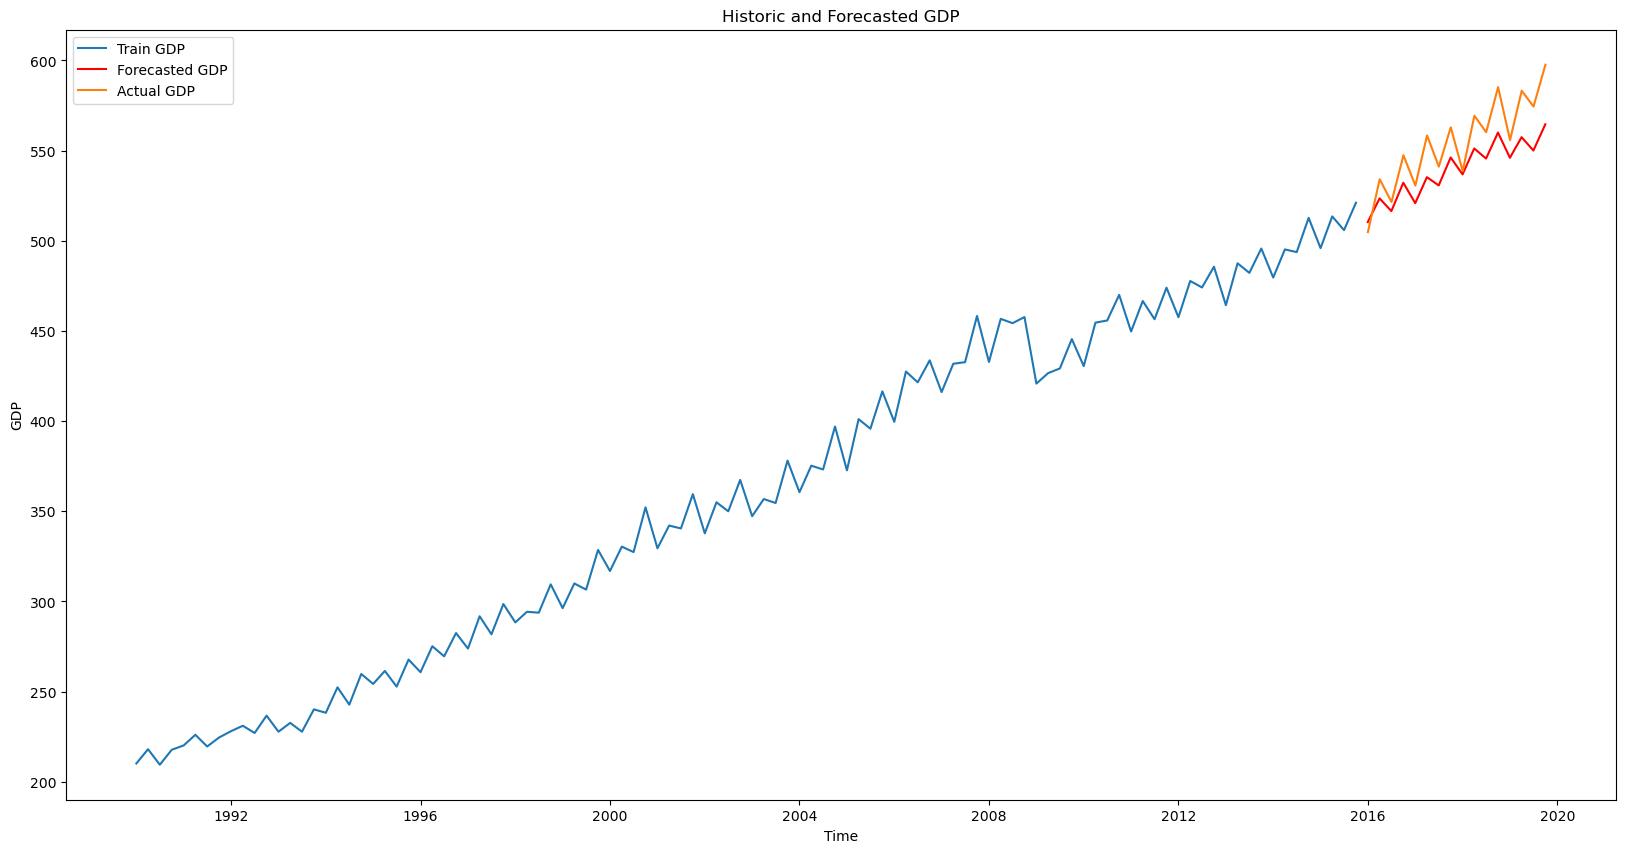

In [7]:
# Forecast 16 quarters ahead based on test indu and cons
fut_exog = pd.concat([indu_test, cons_test], axis=1)
fut_exog.drop('Time', axis=1, inplace=True)

forecast = model_fit.get_forecast(steps=16, exog=fut_exog.iloc[-16:])

# Get the forecasted values
forecast_values = forecast.predicted_mean

# Define the forecast dates
forecast_dates = pd.date_range(start=gdp_train['Time'].iloc[-1], periods=16, freq='QE')

# Plotting the forecasted values
# Plotting historic GDP and forecasted GDP
plt.figure(figsize=(20,10))
plt.plot(gdp_train['Time'], gdp_train['Value'], label='Train GDP')
plt.plot(forecast_dates, forecast_values, color='red', label='Forecasted GDP')
plt.plot(gdp_test['Time'], gdp_test['Value'], label='Actual GDP')

# Set the title and labels
plt.title('Historic and Forecasted GDP')
plt.xlabel('Time')
plt.ylabel('GDP')

# Add a legend
plt.legend()

# Display the plot
plt.show()

In [8]:
#Comparing the forecasted values with the actual values trough RMSE
# Calculate the RMSE
rmse_value = rmse(gdp_test['Value'], forecast_values)

# Print the RMSE
print("The RMSE is", rmse_value)

#The RMSE is 16,5. This is a good result, as the GDP is a very volatile variable.

The RMSE is 17.759493989888977
